# Abalone Portfolio Project

### Task

Predicting the age of abalone from physical measurements.

### Problem

 Typically, the age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope - a boring and time-consuming task.  

### Solution

Create a Machine Learning algorithm that will predict the age of an abalone from physical measurements only.

### Dataset Information

* 8 Attributes
* 4177 Instances

<span style="background-color: #f0f0f0; padding: 0px; display: inline-block; margin-bottom: 5px;">
Sex :</span> M (Male), F (Female), I (Infant) </br>
<span style="background-color: #f0f0f0; padding: -5px; display: inline-block; margin-bottom: 5px;">
Length :</span> continuous - longest

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from pandas_profiling import ProfileReport

%matplotlib inline

from mpl_toolkits.mplot3d import axes3d

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor


In [2]:
import warnings

warnings.filterwarnings("ignore")


### Import Data

In [3]:
DataPath = 'Data/abalone.data'
data = pd.read_csv(DataPath, header=None, index_col=False)
data.columns = ['sex','length','diameter','height','whole_weight','shucked_weight',
                'viscera_weight','shell_weight','rings']
data.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Exploratory Data Analysis

In [4]:
data.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


<Figure size 1200x900 with 0 Axes>

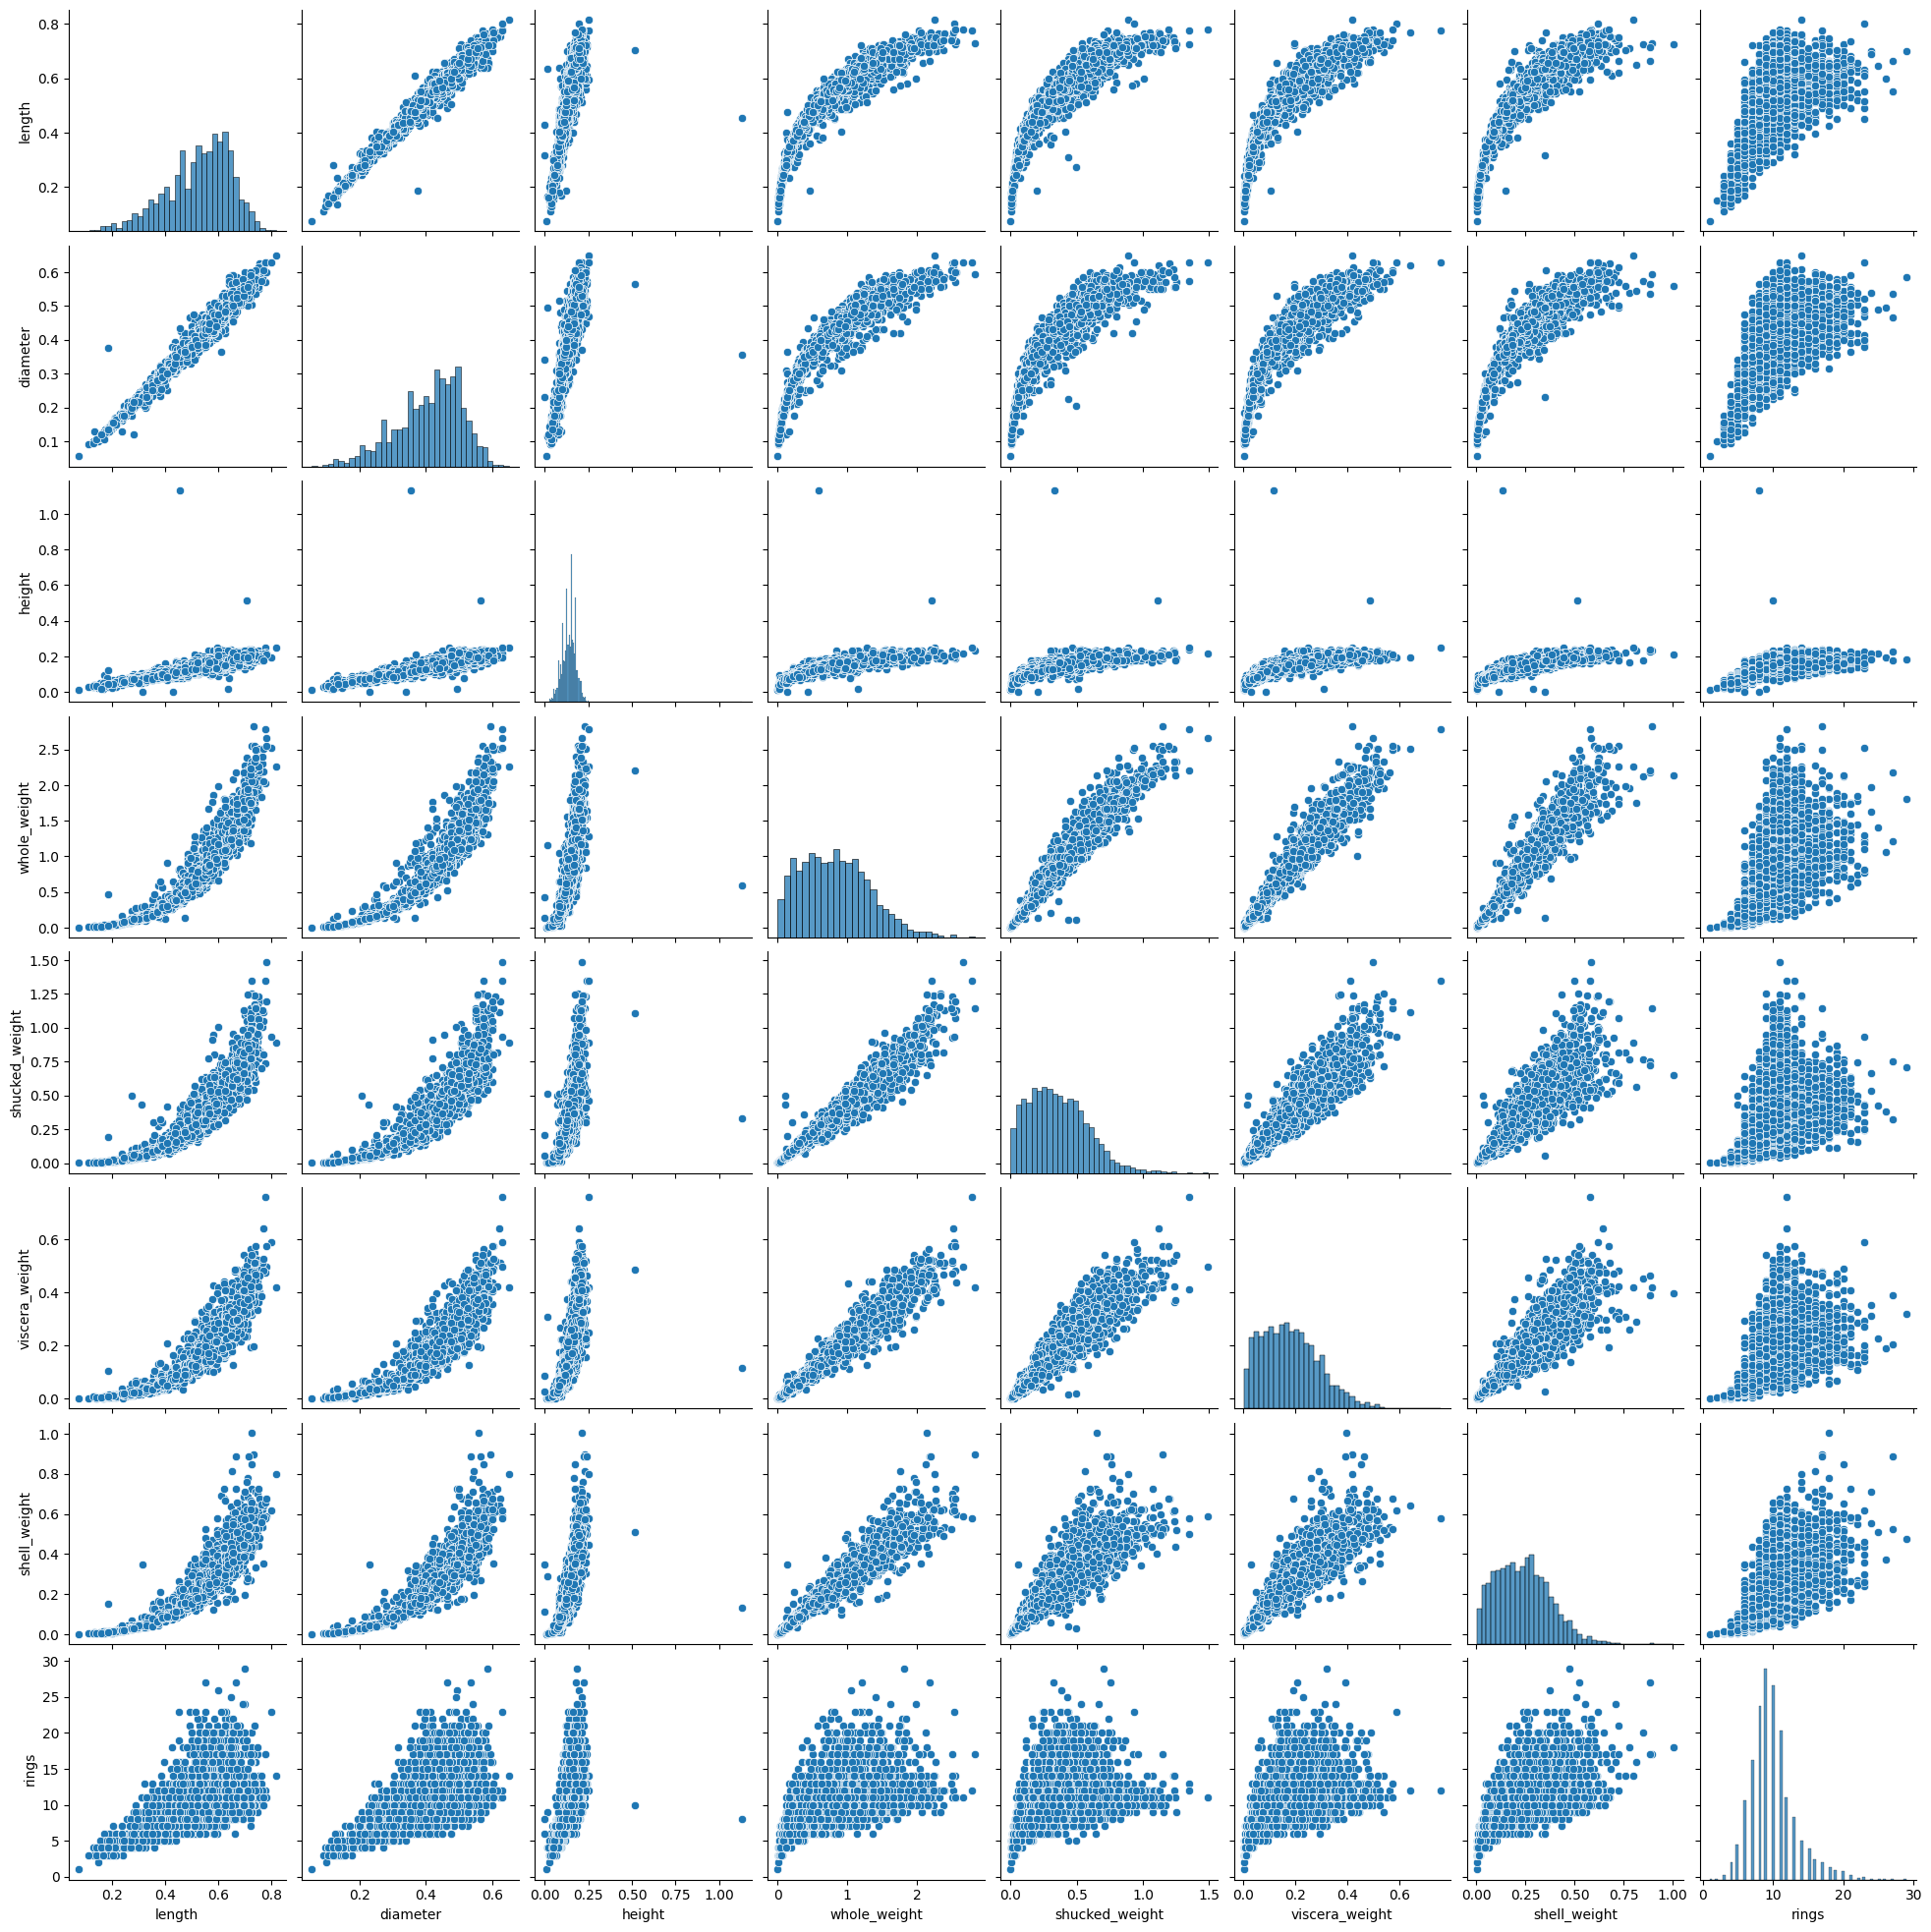

In [6]:
plt.figure(figsize=(12,9))
sns.pairplot(data)

<Axes: >

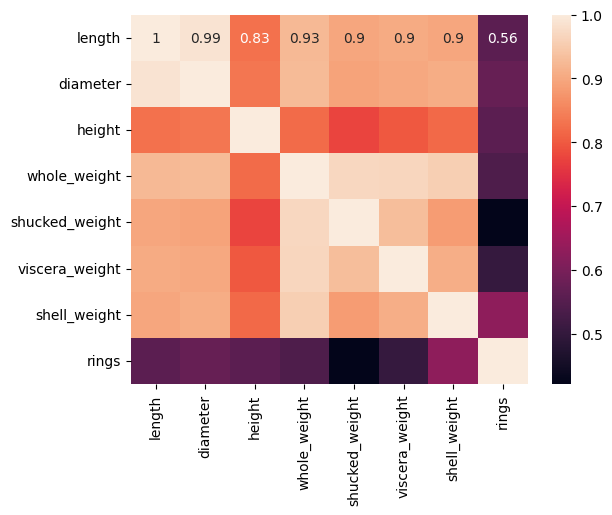

In [6]:
sns.heatmap(data.corr(numeric_only=True), annot=True)

In [8]:
data.columns

Index(['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'rings'],
      dtype='object')

Text(0, 0.5, 'Number of rings')

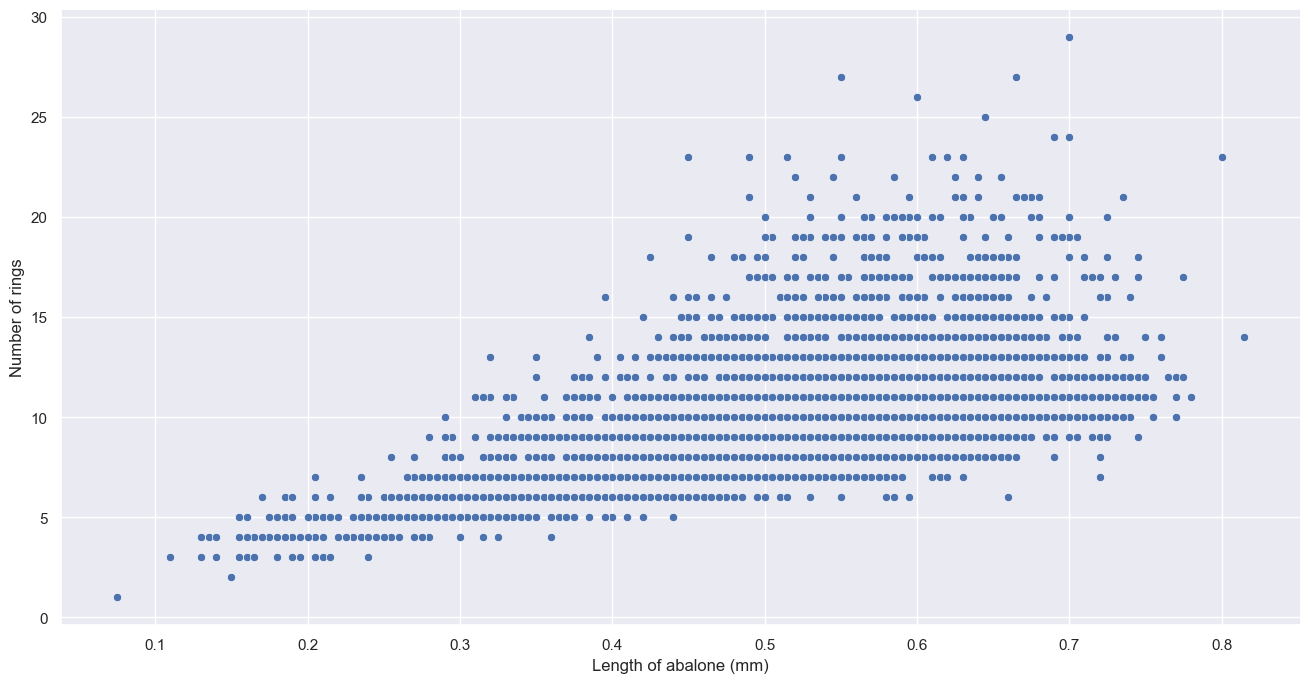

In [9]:
sns.set_theme()
plt.figure(figsize=(16,8))
sns.scatterplot(data=data, x='length', y='rings')
plt.xlabel('Length of abalone (mm)')
plt.ylabel('Number of rings')

Text(0, 0.5, 'Number of rings')

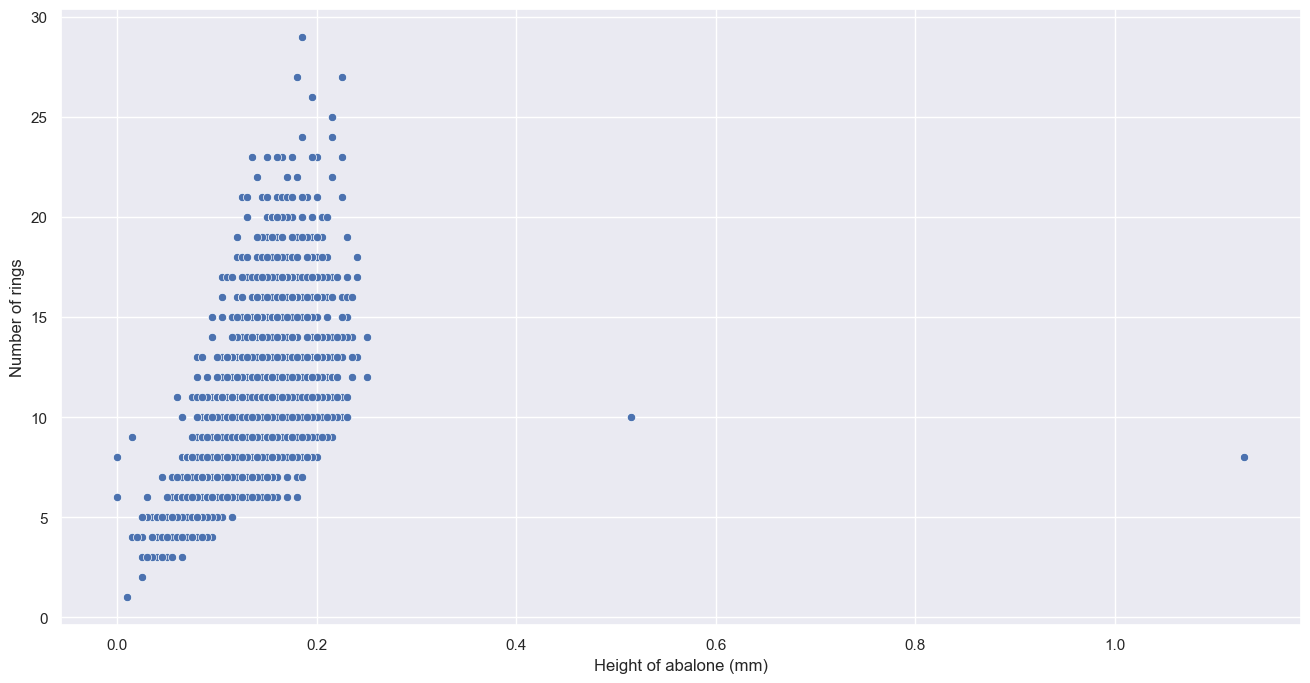

In [11]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=data, x='height', y='rings')
plt.xlabel('Height of abalone (mm)')
plt.ylabel('Number of rings')

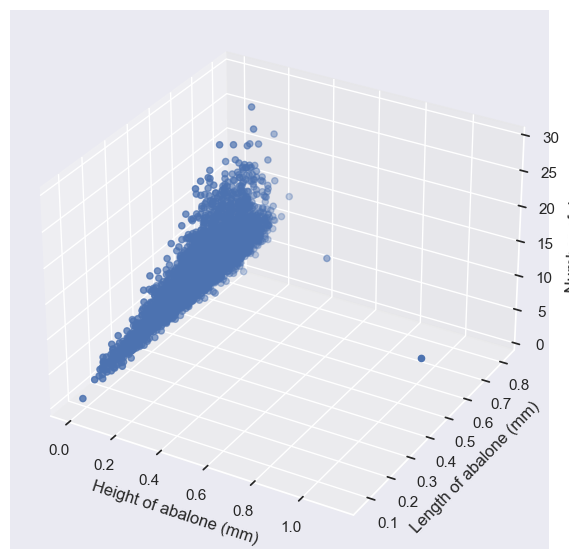

In [12]:
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection = '3d')

ax.set_xlabel('Height of abalone (mm)')
ax.set_ylabel('Length of abalone (mm)')
ax.set_zlabel('Number of rings')

ax.scatter3D(data['height'],data['length'],data['rings'])
plt.show()

### Feature Engineering
#### One-hot encoding

In [7]:
encode_data = pd.get_dummies(data)
encode_data.head()

print(encode_data.shape)

(4177, 11)


### Modeling
#### Split dataset

In [8]:
training_set, validation_set = train_test_split(encode_data, test_size=0.2, random_state=101)
print(training_set.shape)
print(validation_set.shape)

(3341, 11)
(836, 11)


#### Baseline model: multiple linear regression

In [9]:
# Feature variables
x = training_set[['length','height']]
y = training_set['rings'].values.reshape(-1, 1)

x_val = validation_set[['length', 'height']]
y_val = validation_set['rings']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [13]:
lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train)

# Test RMSE
lin_reg_pred = lin_reg.predict(x_test)
test_rmse = mean_squared_error(y_test, lin_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

# Validation RMSE
lin_reg_val = lin_reg.predict(x_val)
val_rmse = mean_squared_error(y_val, lin_reg_val, squared=False)
print(f'Validation RMSE: {val_rmse}')

Test RMSE: 2.5160587538094785
Validation RMSE: 2.932024692438934


### Multiple linear regression with regularization (Ridge regression)

In [17]:
# Create a ridge regression model
ridge = Ridge()

# Cross validation to optimize regularization parameters
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

# Initialize Grid Search, to select optimal hyperparameters for a given algorithm
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_root_mean_squared_error', cv=5)

ridge_regressor.fit(x_train, y_train)

print(ridge_regressor.best_params_)
print(-ridge_regressor.best_score_)


{'alpha': 0.01}
2.5980351988213273


In [18]:
# re-initialize Ridge regression model with alpha
ridge = Ridge(alpha=0.01)

# Fit the model to x_train and y_train
ridge.fit(x_train, y_train)

# Get predictions from test data
ridge_reg_pred = ridge.predict(x_test)

# Test RMSE
test_rmse = mean_squared_error(y_test, ridge_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

# Validation RMSE
ridge_reg_pred_val = ridge.predict(x_val)
val_rmse = mean_squared_error(y_val, ridge_reg_pred_val, squared=False)
print(f'Validation RMSE: {val_rmse}')

Test RMSE: 2.5160277440143037
Validation RMSE: 2.924156163258718


### Multiple linear regression with regularization: Lasso regression

In [19]:
# Lasso regression initialization
lasso = Lasso(tol=0.05)

# Parameter grid definition
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

# Grid search CV
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

print(lasso_regressor.best_params_)
print(-lasso_regressor.best_score_)


{'alpha': 0.0001}
6.771606153420161


In [20]:
# Lasso regression initialization
lasso_reg = Lasso(alpha = 0.0001)

# Fitting the model to training data
lasso_reg.fit(x_train, y_train)

# Test RMSE
lasso_reg_pred = lasso_reg.predict(x_test)
test_rmse = mean_squared_error(y_test, lasso_reg_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

# Validation RMSE
lasso_reg_pred_val = lasso_reg.predict(x_val)
val_rmse = mean_squared_error(y_val, lasso_reg_pred_val, squared=False)
print(f'Validation RMSE: {val_rmse}')

Test RMSE: 2.516044068286539
Validation RMSE: 2.928091235776355


### Tree-based models

In [21]:
data.columns

Index(['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'rings'],
      dtype='object')

In [16]:
x = training_set.drop(['diameter', 'whole_weight', 'shucked_weight',
                       'viscera_weight', 'shell_weight', 'rings'], axis=1)

y = training_set['rings'].values.reshape(-1,1)

x_val = validation_set.drop(['diameter', 'whole_weight', 'shucked_weight',
                       'viscera_weight', 'shell_weight', 'rings'], axis=1)

y_val = validation_set['rings'].values.reshape(-1,1)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

### Random Forest

In [24]:
# Random forest initialization
rf = RandomForestRegressor()

# Parameter grid definition
parameters = {'n_estimators': [int(x) for x in np.linspace(100, 1000, 10)]}

# Grid search cross validation
rf_regressor = GridSearchCV(rf, parameters, scoring='neg_mean_squared_error', cv=5)
rf_regressor.fit(x_train, y_train.ravel())

print(rf_regressor.best_params_)
print(rf_regressor.best_score_)

{'n_estimators': 1000}
-8.17542219256492


In [26]:
rf_reg = RandomForestRegressor(n_estimators = 1000)
rf_reg.fit(x_train, y_train)

# Test RMSE
rf_reg_pred = rf_reg.predict(x_test)
test_rmse = mean_squared_error(y_test, rf_reg_pred, squared=False)
print(f' Test RMSE:', {test_rmse})

# Validation RMSE
rf_reg_pred_val = rf_reg.predict(x_val)
val_rmse = mean_squared_error(y_val, rf_reg_pred_val, squared=False)
print(f'Validation RMSE:', {val_rmse})

 Test RMSE: {2.880669588936373}
Validation RMSE: {2.8630932769859583}


### Bagging

In [10]:
# Bagging Initialization
bg = BaggingRegressor()

Parameters = {'n_estimators': [int(x) for x in np.linspace(10, 1000, 10)] ,
             'max_samples': [float(x) for x in np.arange(0.1, 1.1, 0.1)]
             }

bg_regressor = GridSearchCV(bg, Parameters, scoring='neg_mean_squared_error', cv=5)
bg_regressor.fit(x_train, y_train.ravel())

print(bg_regressor.best_params_)
print(bg_regressor.best_score_)


{'max_samples': 0.1, 'n_estimators': 890}
-6.580699268589504


In [11]:
bg_reg = BaggingRegressor(n_estimators = 890, max_samples = 0.1)

bg_reg.fit(x_train, y_train)

# Test RMSE
bg_reg_pred = bg_reg.predict(x_test)
test_rmse = mean_squared_error(y_test, bg_reg_pred, squared=False)
print(f' Test RMSE:', {test_rmse})

# Validation RMSE
bg_reg_pred_val = bg_reg.predict(x_val)
val_rmse = mean_squared_error(y_val, bg_reg_pred_val, squared=False)
print(f'Validation RMSE:', {val_rmse})

 Test RMSE: {2.5630806056354722}
Validation RMSE: {2.5672651933763535}


### Complile Results

In [18]:
rmse_compilation = {
    'model':['Linear Regression', 'Ridge Regression', 'Lasso', 'Random Forest', 'Bagging'],
    'RMSE':[2.93,2.92,2.93,2.86,2.57]
}

df_rmse_complilation = pd.DataFrame(data=rmse_compilation)
print(df_rmse_complilation.sort_values(by=['RMSE'], ascending=True))

               model  RMSE
4            Bagging  2.57
3      Random Forest  2.86
1   Ridge Regression  2.92
0  Linear Regression  2.93
2              Lasso  2.93


Bagging is the best model.